# Exploration Final Project
**CMDP3401**

**Investigators:** Connor Saari & Jason Kibozi-Yocka
<br>**Stakeholder:** Jason Zietz, Ph.D.

## Importing Libraries

In [2]:
%run utility.ipynb
import pandas as pd
import altair as alt

## Loading Data

In [3]:
# load in data
df = loadAndCleanData(r"1201Data-Anonymized.csv")
df.set_index('UID', inplace=True)
#df.replace("-", 0, inplace=True)

In [5]:
# format pandas to show all columns
pd.set_option('display.max_columns', None)

### Cleaning Data

In [6]:
# rename columns for convenience
df.columns = ['Q.Pretest', 'Q.Posttest', 'PreCred', 'PostCred', 'PreTA.B', 'PostTA.B', 'Clicker.G', 'Clicker.B', 'Clicker.Adj',
              'Clicker.F', 'A.LabWk3.P', 'A.LabWk4.P', 'A.LabWk5.P', 'A.LabWk6.P', 'A.LabWk11.P', 'A.LabWk12.P', 'A.LabWk13.P',
              'A.LabWk15.P', 'A.LabWk7.P', 'A.LabWk8.P', 'A.LabWk9.P', 'Lab.Avg', 'Q.Hwk1.S', 'Q.Hwk1.L', 'A.Hwk1.I', 'Hwk1.F',
              'A.Hwk2.I', 'Q.Hwk2.S', 'Q.Hwk2.L', 'Hwk2.F', 'A.Hwk3.I', 'Q.Hwk3.S', 'Q.Hwk3.L', 'Hwk3.F', 'Q.Hwk4.S',
              'A.Hwk4.I', 'Q.Hwk4.L', 'Hwk4.F', 'Q.Hwk5.S', 'A.Hwk5.I', 'Q.Hwk5.L', 'Hwk.F', 'Q.Hwk6.S', 'Q.Hwk6.SC', '?',
              'A.Hwk6.I', 'Q.Hwk6.L', 'Hwk6.F', 'Q.Hwk7.S', 'A.Hwk7.I', 'Q.Hwk7.L', 'Hwk7.F', 'Q.Hwk8.S','Q.Hwk8.L', 'Hwk8.F',
              'Hwk.Avg', 'TATAAT1.G','TATAAT2.G', 'TATAAT.Avg', 'Final.Grade','Notes','Unamed: 62','Course.Total']

In [7]:
# drop unhelpful columns
df.drop(columns=['Clicker.Adj','?','Notes','Unamed: 62'], inplace=True)

In [8]:
# reorder columns to fix inconsitencies
order = ["Q.Pretest", "PreCred", "Q.Posttest", "PostCred", "PreTA.B", "PostTA.B", "Clicker.G", "Clicker.B", "Clicker.F",
         "A.LabWk3.P", "A.LabWk4.P", "A.LabWk5.P", "A.LabWk6.P", "A.LabWk7.P", "A.LabWk8.P"," A.LabWk9.P", "A.LabWk11.P",
         "A.LabWk12.P", "A.LabWk13.P", "A.LabWk15.P", "Lab.Avg", "A.Hwk1.I", "Q.Hwk1.S", "Q.Hwk1.L", "Hwk1.F", "A.Hwk2.I",
         "Q.Hwk2.S", "Q.Hwk2.L", "Hwk2.F", "A.Hwk3.I", "Q.Hwk3.S", "Q.Hwk3.L", "Hwk3.F", "A.Hwk4.I", "Q.Hwk4.S", "Q.Hwk4.L",
         "Hwk4.F", "A.Hwk5.I", "Q.Hwk5.S", "Q.Hwk5.L", "Hwk.F", "A.Hwk6.I", "Q.Hwk6.S", "Q.Hwk6.SC", "Q.Hwk6.L", "Hwk6.F",
         "A.Hwk7.I", "Q.Hwk7.S", "Q.Hwk7.L", "Hwk7.F", "Q.Hwk8.S", "Q.Hwk8.L", "Hwk8.F", "Hwk.Avg", "TATAAT1.G", "TATAAT2.G",
         "TATAAT.Avg", "Course.Total", "Final.Grade"]

df = df.reindex(columns=order)

In [9]:
df.head()

,Q.Pretest,PreCred,Q.Posttest,PostCred,PreTA.B,PostTA.B,Clicker.G,Clicker.B,Clicker.F,A.LabWk3.P,A.LabWk4.P,A.LabWk5.P,A.LabWk6.P,A.LabWk7.P,A.LabWk8.P,A.LabWk9.P,A.LabWk11.P,A.LabWk12.P,A.LabWk13.P,A.LabWk15.P,Lab.Avg,A.Hwk1.I,Q.Hwk1.S,Q.Hwk1.L,Hwk1.F,A.Hwk2.I,Q.Hwk2.S,Q.Hwk2.L,Hwk2.F,A.Hwk3.I,Q.Hwk3.S,Q.Hwk3.L,Hwk3.F,A.Hwk4.I,Q.Hwk4.S,Q.Hwk4.L,Hwk4.F,A.Hwk5.I,Q.Hwk5.S,Q.Hwk5.L,Hwk.F,A.Hwk6.I,Q.Hwk6.S,Q.Hwk6.SC,Q.Hwk6.L,Hwk6.F,A.Hwk7.I,Q.Hwk7.S,Q.Hwk7.L,Hwk7.F,Q.Hwk8.S,Q.Hwk8.L,Hwk8.F,Hwk.Avg,TATAAT1.G,TATAAT2.G,TATAAT.Avg,Course.Total,Final.Grade
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,1,-,0,0,0,79.764,2.5,81.044575,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,70.0,0,70.0,0.0,70.000,0.0,70.000,0.0,50,0,50.0,0,90.0,0.0,90.0,0.0,0.000,100.0,0,100.0,0,100.0,0,100,0.0,0.0,0.0,72.500000,90.0,93.5,91.75,317.600,81.221415
2,-,0,2,1,0,0,94.057,2.5,95.337575,100,100,100,100,100,100,NaN,100,100,100,100,90.909091,0,75.0,0.0,75.0,0,100.0,0,100.0,0.0,71.667,0.0,71.667,0.0,0,0,0.0,0,0.0,25.0,25.0,0.0,0.000,0.0,50,50.0,0,0.0,45,45,0.0,0.0,0.0,45.833375,85.0,92.0,88.50,305.180,68.895566
3,8,1,8,1,0,0,100.000,5.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,81.0,0,81.0,0.0,100.000,0.0,100.000,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,100.000,100.0,0,100.0,0,100.0,0,100,100.0,0.0,100.0,97.625000,95.0,92.0,93.50,314.021,97.837500
4,4,1,4,1,1,1,99.232,10.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,96,81.0,0,96.0,0.0,96.000,0.0,96.000,0.0,82,0,82.0,0,100.0,0.0,100.0,0.0,6.667,100.0,0,100.0,0,100.0,0,100,0.0,50.0,50.0,90.500000,92.0,94.0,93.00,376.703,94.200000
5,4,1,5,1,1,0,99.693,7.5,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,100.0,0,100.0,0.0,96.000,0.0,96.000,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,56.667,100.0,0,100.0,0,100.0,0,100,100.0,0.0,100.0,99.500000,100.0,97.0,98.50,344.400,99.525000


In [5]:
# A : assignment
# B : bonus
# F : final
# G : grade
# I : interview grade score
# L : late work
# P : participation
# Q : quiz
# S : submission
# SC : score
# TATAAT : teach a TA a thing (assignment)

### Creating Data Subsets

DATAFRAME 1
<br>*This is a dataframe consisting of the students who had completed late work.*

In [10]:
# create empty dataframe
dfLate = pd.DataFrame(columns = order)

In [11]:
# populate empty dataframe
for feature in df.columns:
    if '.L' in feature and 'Lab' not in feature:
        if dfLate.size == 0:
            dfLate = df[df[feature] != 0]
        else:
            dfLate = dfLate.append(df[df[feature] != 0])

In [12]:
# clean it up a bit more
dfLate.sort_index(inplace=True)
dfLate.drop_duplicates(inplace=True)

In [13]:
dfLate

,Q.Pretest,PreCred,Q.Posttest,PostCred,PreTA.B,PostTA.B,Clicker.G,Clicker.B,Clicker.F,A.LabWk3.P,A.LabWk4.P,A.LabWk5.P,A.LabWk6.P,A.LabWk7.P,A.LabWk8.P,A.LabWk9.P,A.LabWk11.P,A.LabWk12.P,A.LabWk13.P,A.LabWk15.P,Lab.Avg,A.Hwk1.I,Q.Hwk1.S,Q.Hwk1.L,Hwk1.F,A.Hwk2.I,Q.Hwk2.S,Q.Hwk2.L,Hwk2.F,A.Hwk3.I,Q.Hwk3.S,Q.Hwk3.L,Hwk3.F,A.Hwk4.I,Q.Hwk4.S,Q.Hwk4.L,Hwk4.F,A.Hwk5.I,Q.Hwk5.S,Q.Hwk5.L,Hwk.F,A.Hwk6.I,Q.Hwk6.S,Q.Hwk6.SC,Q.Hwk6.L,Hwk6.F,A.Hwk7.I,Q.Hwk7.S,Q.Hwk7.L,Hwk7.F,Q.Hwk8.S,Q.Hwk8.L,Hwk8.F,Hwk.Avg,TATAAT1.G,TATAAT2.G,TATAAT.Avg,Course.Total,Final.Grade
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-,0,2,1,0,0,94.057,2.5,95.337575,100,100,100,100,100,100,NaN,100,100,100,100,90.909091,0,75.0,0.0,75.0,0,100.0,0,100.0,0.00,71.667,0.000,71.667,0.0,0,0,0.0,0,0.000,25.000,25.000,0.0,0.000,0.00,50,50.00,0,0.000,45,45,0.000,0.000,0.000,45.833375,85.0,92.0,88.50,305.180,68.895566
4,4,1,4,1,1,1,99.232,10.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,96,81.0,0,96.0,0.00,96.000,0.000,96.000,0.0,82,0,82.0,0,100.000,0.000,100.000,0.0,6.667,100.00,0,100.00,0,100.000,0,100,0.000,50.000,50.000,90.500000,92.0,94.0,93.00,376.703,94.200000
6,2,1,3,1,1,0,56.045,7.5,59.886725,100,100,100,100,100,100,NaN,100,100,100,100,90.909091,0,100.0,0.0,100.0,0,70.0,0,70.0,0.00,100.000,0.000,100.000,0.0,100,0,100.0,0,100.000,0.000,100.000,0.0,0.000,100.00,0,100.00,0,0.000,50,50,0.000,0.000,0.000,77.500000,92.0,95.0,93.50,335.888,78.388709
7,4,1,5,1,1,1,100.000,10.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,97,85.0,0,97.0,0.00,40.000,28.000,40.000,82.8,14,0,82.8,0,100.000,0.000,100.000,0.0,40.000,40.00,0,40.00,0,100.000,0,100,85.000,0.000,85.000,80.600000,100.0,97.0,98.50,337.462,90.075000
13,3,1,7,1,1,0,89.498,7.5,93.339725,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,68.0,0,68.0,0.00,100.000,0.000,100.000,0.0,100,0,100.0,0,100.000,0.000,100.000,0.0,100.000,100.00,0,100.00,0,100.000,0,100,55.000,35.000,55.000,90.375000,93.0,96.0,94.50,337.463,93.030445
14,3,1,8,1,1,1,89.805,10.0,94.927300,100,100,100,0,100,100,NaN,100,100,100,100,90.909091,0,100.0,0.0,100.0,0,100.0,0,100.0,0.00,96.000,0.000,96.000,0.0,100,0,100.0,0,60.000,50.000,60.000,0.0,50.000,50.00,0,50.00,0,100.000,0,100,100.000,0.000,100.000,88.250000,97.0,97.0,97.00,381.670,91.296824
26,3,1,8,1,1,1,87.141,10.0,92.263300,100,100,100,100,0,100,NaN,100,100,0,100,72.727273,0,100.0,0.0,100.0,0,90.0,0,90.0,0.00,50.000,0.000,50.000,80.0,0,0,80.0,0,95.000,2.500,95.000,0.0,100.000,100.00,0,100.00,80,0.000,0,80,55.000,0.000,55.000,81.250000,72.0,91.0,81.50,313.286,82.211751
29,5,1,8,1,1,1,98.463,10.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,88,70.0,0,88.0,0.00,70.000,0.000,70.000,80.0,14,0,80.0,86,66.667,50.000,86.000,0.0,0.000,100.00,0,100.00,0,100.000,0,100,0.000,0.000,0.000,78.000000,94.0,95.0,94.50,367.662,88.175000
31,3,1,3,1,1,1,57.480,10.0,62.602300,100,0,100,0,100,100,NaN,100,100,100,100,81.818182,0,100.0,0.0,100.0,0,100.0,0,100.0,0.00,41.667,40.000,41.667,0.0,8,50,50.0,0,100.000,0.000,100.000,0.0,100.000,100.00,0,100.00,0,100.000,0,100,100.000,0.000,100.000,86.458375,90.0,95.0,92.50,374.352,81.897375


DATAFRAME 2
<br>*This is a dataframe consisting of the students who had completed no late work.*

In [14]:
# create empty dataframe
dfNoLate = pd.DataFrame(columns = order)

In [15]:
# populate empty dataframe
for feature in df.columns:
    if '.L' in feature and 'Lab' not in feature:
        if dfNoLate.size == 0:
            dfNoLate = df[df[feature] == 0]
        else:
            dfNoLate = dfNoLate.append(df[df[feature] == 0])

In [16]:
dfNoLate = dfNoLate[(dfNoLate["Q.Hwk1.L"] == 0.0) & (dfNoLate["Q.Hwk2.L"] == 0.0) & (dfNoLate["Q.Hwk3.L"] == 0.000) &
                    (dfNoLate["Q.Hwk4.L"] == 0.0) & (dfNoLate["Q.Hwk5.L"] == 0.0) & (dfNoLate["Q.Hwk6.L"] == 0.0) &
                    (dfNoLate["Q.Hwk7.L"] == 0.0) & (dfNoLate["Q.Hwk8.L"] == 0.0)]

In [17]:
# clean it up a bit more
dfNoLate.sort_index(inplace=True)
dfNoLate.drop_duplicates(inplace=True)

In [18]:
dfNoLate

,Q.Pretest,PreCred,Q.Posttest,PostCred,PreTA.B,PostTA.B,Clicker.G,Clicker.B,Clicker.F,A.LabWk3.P,A.LabWk4.P,A.LabWk5.P,A.LabWk6.P,A.LabWk7.P,A.LabWk8.P,A.LabWk9.P,A.LabWk11.P,A.LabWk12.P,A.LabWk13.P,A.LabWk15.P,Lab.Avg,A.Hwk1.I,Q.Hwk1.S,Q.Hwk1.L,Hwk1.F,A.Hwk2.I,Q.Hwk2.S,Q.Hwk2.L,Hwk2.F,A.Hwk3.I,Q.Hwk3.S,Q.Hwk3.L,Hwk3.F,A.Hwk4.I,Q.Hwk4.S,Q.Hwk4.L,Hwk4.F,A.Hwk5.I,Q.Hwk5.S,Q.Hwk5.L,Hwk.F,A.Hwk6.I,Q.Hwk6.S,Q.Hwk6.SC,Q.Hwk6.L,Hwk6.F,A.Hwk7.I,Q.Hwk7.S,Q.Hwk7.L,Hwk7.F,Q.Hwk8.S,Q.Hwk8.L,Hwk8.F,Hwk.Avg,TATAAT1.G,TATAAT2.G,TATAAT.Avg,Course.Total,Final.Grade
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,1,-,0,0,0,79.764,2.5,81.044575,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,70.0,0,70.0,0.0,70.0,0.0,70.0,0.0,50,0,50.0,0,90.0,0.0,90.0,0.0,0.000,100.0,0,100.0,0,100.0,0,100,0.0,0.0,0.0,72.5000,90.0,93.5,91.75,317.600,81.221415
3,8,1,8,1,0,0,100.000,5.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,81.0,0,81.0,0.0,100.0,0.0,100.0,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,100.000,100.0,0,100.0,0,100.0,0,100,100.0,0.0,100.0,97.6250,95.0,92.0,93.50,314.021,97.837500
5,4,1,5,1,1,0,99.693,7.5,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,100.0,0,100.0,0.0,96.0,0.0,96.0,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,56.667,100.0,0,100.0,0,100.0,0,100,100.0,0.0,100.0,99.5000,100.0,97.0,98.50,344.400,99.525000
8,1,1,6,1,1,1,99.488,10.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,100.0,0,100.0,0.0,100.0,0.0,100.0,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,0.000,90.0,0,90.0,0,0.0,0,0,0.0,0.0,0.0,73.7500,94.0,94.0,94.00,376.895,85.975000
9,1,1,5,1,1,0,100.000,7.5,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,100.0,0,100.0,0.0,96.0,0.0,96.0,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,100.000,100.0,0,100.0,0,100.0,0,100,85.0,0.0,85.0,97.6250,100.0,100.0,100.00,385.083,98.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,1,-,0,1,0,100.000,5.0,100.000000,100,0,100,100,100,100,NaN,100,100,100,0,81.818182,0,100.0,0.0,100.0,0,85.0,0,85.0,0.0,40.0,0.0,40.0,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,0.000,100.0,0,100.0,0,90.0,0,90,100.0,0.0,100.0,89.3750,92.0,94.0,93.00,383.016,90.910227
192,1,1,8,1,1,1,91.752,10.0,96.874300,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,85.0,0,85.0,0.0,100.0,0.0,100.0,0.0,100,0,100.0,0,70.0,0.0,70.0,0.0,0.000,82.0,0,82.0,0,90.0,0,90,100.0,0.0,100.0,90.8750,95.0,94.0,94.50,207.196,93.987360
193,7,1,6,1,0,0,100.000,5.0,100.000000,100,100,100,100,100,100,NaN,100,100,100,100,100.000000,0,100.0,0.0,100.0,0,100.0,0,100.0,0.0,92.0,0.0,92.0,0.0,100,0,100.0,0,100.0,0.0,100.0,0.0,100.000,100.0,0,100.0,0,100.0,0,100,85.0,0.0,85.0,97.1250,95.0,97.0,96.00,70.615,97.962500


## Analyzing Data

### Computing Means

In [19]:
# this is the average grade of the student who completed late work throughout the course
dfLate["Final.Grade"].mean()

77.32250456527777

In [20]:
# this is the average grade of the student who completed no late work throughout the course
dfNoLate["Final.Grade"].mean()

85.51066955348101

### Visualizations

Text(63.125, 0.5, 'Homework Average')

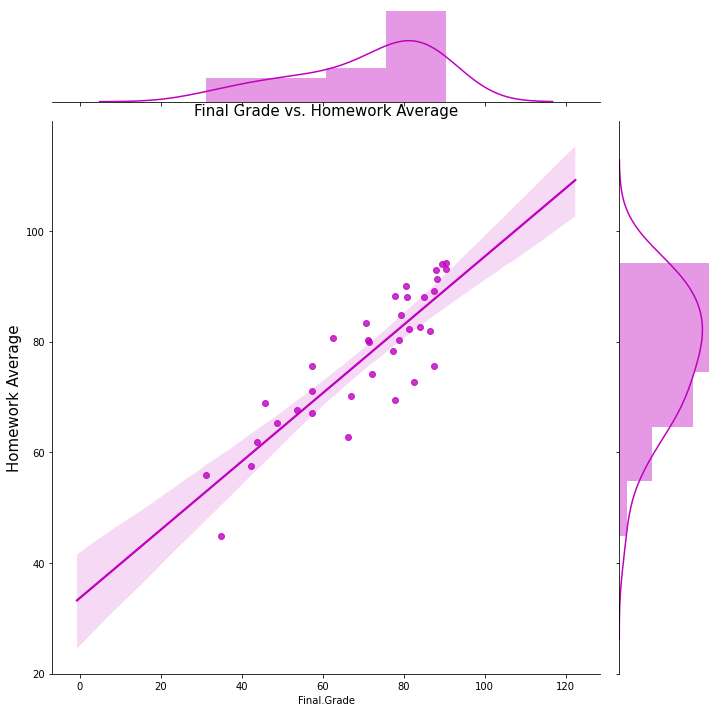

In [59]:
#This plot represents the average homework grade compared to 
    #the final grades of the student who completed late work

import matplotlib.pyplot as plt
import seaborn as sb
x = dfLate.copy()

latePlot = sb.jointplot(x = "Hwk.Avg", y = "Final.Grade" ,data=dfLate,kind="reg", truncate=False,
                  color="m", height=10)


plt.title("Final Grade vs. Homework Average", fontsize = 15)
plt.xlabel("Final.Grade", fontsize = 10) # label for x-axis
plt.ylabel("Homework Average", fontsize = 15)



Text(63.125, 0.5, 'Homework Average')

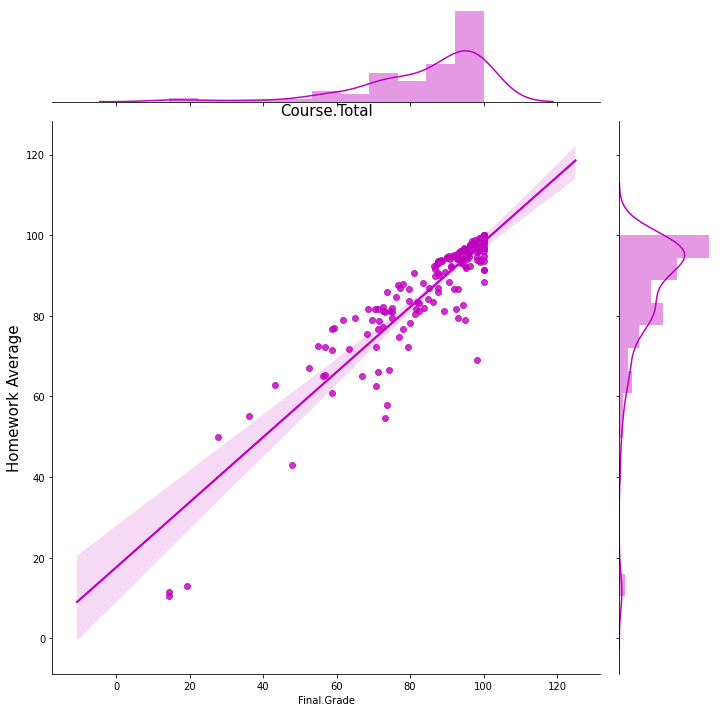

In [60]:
#This plot represents the average homework grade compared to 
    #the final grades of the student who completed no late work
    
import matplotlib.pyplot as plt
import seaborn as sb
y = dfNoLate.copy()

latePlot = sb.jointplot(x = "Hwk.Avg", y = "Final.Grade" ,data=dfNoLate,kind="reg", truncate=False,
                  color="m", height=10)


plt.title("Course.Total", fontsize = 15)
plt.xlabel("Final.Grade", fontsize = 10) # label for x-axis
plt.ylabel("Homework Average", fontsize = 15)

